In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import reports
import utilities
import clean
import normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = utilities.create_spelling_dictionary(wordlist_dir, wordlists)

In [7]:
title = "IR"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/IR/baseline

Average verified rate: 0.9209845429108203

Average of error rates: 0.08383389544688026

Total token count: 1176871



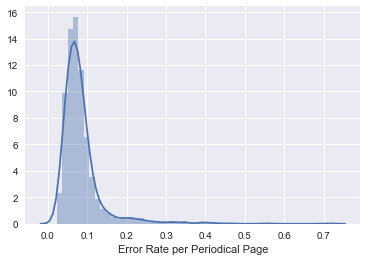

In [10]:
stats = reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = reports.get_errors_summary( stats )
reports.top_errors( errors_summary, 100 )

[('w', 4512),
 ('e', 1999),
 ('m', 1961),
 ('-', 1701),
 ('r', 1655),
 ('f', 1614),
 ('¥', 1404),
 ('d', 1356),
 ('n', 1037),
 ('t', 984),
 ('re-', 939),
 (')', 866),
 ('g', 852),
 ("'", 837),
 ('con-', 837),
 ('(', 767),
 ('in-', 718),
 ('tion', 661),
 ('th', 567),
 ('co', 488),
 ('be-', 387),
 ('mt', 375),
 ('com-', 366),
 ('de-', 349),
 ('ñ', 348),
 ('rd', 336),
 ('ence', 323),
 ('u', 318),
 ('en-', 287),
 ('*', 278),
 ('meet-', 271),
 ('confer-', 268),
 ('wm', 254),
 ('ex-', 254),
 ('ad-', 253),
 ('ference', 248),
 ('tions', 245),
 ('ment', 245),
 ('indi-', 242),
 ('k', 211),
 ('mo', 206),
 ('mis-', 200),
 ('_', 198),
 ('ac-', 197),
 ('sab-', 194),
 ('*mrs', 188),
 ('at-', 186),
 ('ber', 180),
 ('pro-', 179),
 ('pre-', 178),
 ('presidentñw', 175),
 ('camp-', 172),
 ('ple', 168),
 ('ers', 163),
 ('peo-', 162),
 ('im-', 161),
 ('ap-', 157),
 ('ly', 157),
 ('an-', 148),
 ('dis-', 148),
 ('%', 144),
 ('un-', 138),
 ('rocklane', 137),
 ('seventh-', 132),
 ('ren', 129),
 ('side)', 127),


## Check Special Character Use

In [12]:
reports.tokens_with_special_characters(errors_summary)[:500]

[('¥', 1404),
 (')', 866),
 ('(', 767),
 ('ñ', 348),
 ('*', 278),
 ('_', 198),
 ('*mrs', 188),
 ('presidentñw', 175),
 ('%', 144),
 ('side)', 127),
 ('/', 126),
 ('secretaryñw', 120),
 ('*a', 99),
 ('ñc', 89),
 ('\\v', 74),
 ('committeeñw', 72),
 ('=', 72),
 ('ña', 71),
 ('secretaryñmrs', 65),
 ('ñthe', 60),
 ('treasurerñw', 58),
 ('street)', 58),
 ('*w', 57),
 ('secretariesña', 56),
 ('(west', 56),
 ('treasurerña', 56),
 ('treasurerñt', 55),
 ('*c', 54),
 ('missionaryñr', 53),
 ('*j', 50),
 ('¥¥', 50),
 ('*e', 45),
 ('ô', 41),
 ('(east', 39),
 ('¡', 38),
 ('i)', 38),
 ('ã', 34),
 ('*john', 33),
 ('libertyña', 32),
 ('))', 31),
 ('medicalñdr', 31),
 (']', 30),
 ('**', 28),
 ('secretaryñj', 28),
 ('agentñwm', 28),
 ('*r', 28),
 ('wantedña', 27),
 ('`', 27),
 ('a)', 25),
 ('*s', 25),
 ('agentñj', 24),
 ('ñtest', 24),
 ('[', 24),
 ('educationalñmrs', 23),
 ('%v', 22),
 ('(the', 21),
 ('fieldñarcher', 21),
 ('+', 20),
 ('(e', 19),
 ('*henry', 19),
 ('(a)', 19),
 ('¥¥¥', 19),
 ('¥the', 18),

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/IR/correction1

Average verified rate: 0.9293155255922436

Average of error rates: 0.07463153456998314

Total token count: 1174770



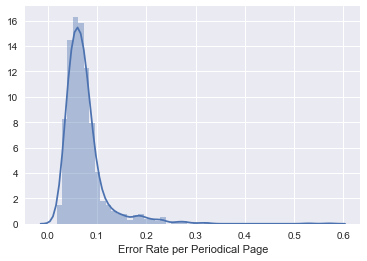

In [14]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('w', 5080),
 ('e', 2163),
 ('m', 1991),
 ('r', 1809),
 ('-', 1798),
 ('f', 1642),
 ('d', 1407),
 ('t', 1102),
 ('n', 1090),
 ('re-', 939),
 ("'", 897),
 ('g', 887),
 ('con-', 837),
 ('in-', 722),
 ('tion', 663),
 ('th', 574),
 ('co', 495),
 ('be-', 388),
 ('mt', 380),
 ('com-', 366),
 ('de-', 349),
 ('rd', 339),
 ('u', 334),
 ('ence', 323),
 ('wm', 291),
 ('en-', 287),
 ('meet-', 272),
 ('confer-', 268),
 ('ex-', 255),
 ('ad-', 253),
 ('ment', 249),
 ('ference', 248),
 ('tions', 246),
 ('indi-', 242),
 ('k', 217),
 ('mo', 208),
 ('mis-', 201),
 ('ac-', 197),
 ('sab-', 194),
 ('at-', 189),
 ('ber', 183),
 ('pro-', 180),
 ('pre-', 179),
 ('camp-', 172),
 ('ple', 168),
 ('ers', 165),
 ('im-', 162),
 ('peo-', 162),
 ('ap-', 158),
 ('ly', 157)]

## Correction 2 -- Fix Line Endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = "correction1"
cycle = "correction2"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/IR/correction2

Average verified rate: 0.9417987630580531

Average of error rates: 0.06224536256323778

Total token count: 1154460



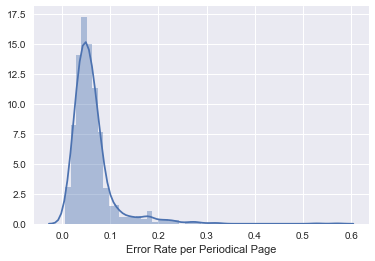

In [17]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('w', 5076),
 ('e', 2155),
 ('m', 1990),
 ('r', 1807),
 ('-', 1770),
 ('f', 1640),
 ('d', 1402),
 ('t', 1095),
 ('n', 1089),
 ("'", 897),
 ('g', 887),
 ('th', 572),
 ('co', 493),
 ('mt', 380),
 ('tion', 361),
 ('rd', 339),
 ('u', 334),
 ('wm', 291),
 ('k', 217),
 ('mo', 207),
 ('ence', 177),
 ('re-', 175),
 ('con-', 156),
 ('tions', 147),
 ('in-', 142),
 ('ference', 139),
 ('rocklane', 139),
 ('ment', 131),
 ('adiana', 121),
 ('z', 114),
 ('ber', 110),
 ("canvassers'", 106),
 ('pr', 105),
 ('seventh-', 97),
 ('ple', 88),
 ('geporter', 86),
 ('ers', 86),
 ('x', 83),
 ('horlacher', 81),
 ('ly', 80),
 ('q', 79),
 ('boze', 79),
 ('nd', 78),
 ('iu', 77),
 ('ren', 76),
 ('indpls', 75),
 ('al', 75),
 ('id', 73),
 ('sionary', 71),
 ('com-', 69)]

## Correction 3 -- Remove Extra Dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = "correction2"
cycle = "correction3"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
#         print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/IR/correction3

Average verified rate: 0.9471213441022522

Average of error rates: 0.05673187183811129

Total token count: 1156043



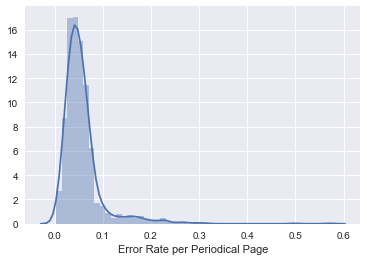

In [20]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('w', 5094),
 ('e', 2181),
 ('m', 1998),
 ('r', 1828),
 ('f', 1647),
 ('d', 1406),
 ('t', 1126),
 ('n', 1097),
 ("'", 926),
 ('g', 891),
 ('co', 605),
 ('th', 577),
 ('mt', 381),
 ('tion', 363),
 ('rd', 340),
 ('u', 336),
 ('wm', 295),
 ('re', 250),
 ('k', 219),
 ('mo', 210),
 ('ence', 178),
 ('tions', 147),
 ('ference', 139),
 ('rocklane', 139),
 ('ment', 131),
 ('adiana', 121),
 ('z', 120),
 ('ber', 111),
 ("canvassers'", 106),
 ('pr', 105),
 ('ple', 88),
 ('x', 86),
 ('geporter', 86),
 ('ers', 86),
 ('al', 85),
 ('horlacher', 81),
 ('q', 81),
 ('ly', 81),
 ('ren', 79),
 ('boze', 79),
 ('nd', 78),
 ('iu', 77),
 ('indpls', 75),
 ('mc', 75),
 ('ex', 75),
 ('id', 73),
 ('sionary', 71),
 ('ft', 69),
 ('minnick', 67),
 ('ent', 66)]

## Correction 4 -- Remove Extra Quotation Marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = "correction3"
cycle = "correction4"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
#         print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/IR/correction4

Average verified rate: 0.9480189176259711

Average of error rates: 0.05579258010118044

Total token count: 1155959



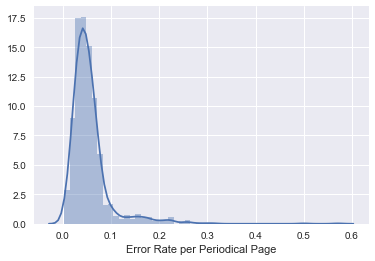

In [23]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('w', 5095),
 ('e', 2195),
 ('m', 1999),
 ('r', 1834),
 ('f', 1649),
 ('d', 1416),
 ('t', 1132),
 ('n', 1106),
 ('g', 892),
 ("'", 825),
 ('co', 605),
 ('th', 577),
 ('mt', 381),
 ('tion', 363),
 ('rd', 340),
 ('u', 336),
 ('wm', 297),
 ('re', 251),
 ('k', 220),
 ('mo', 210),
 ('ence', 178),
 ('tions', 147),
 ('ference', 139),
 ('rocklane', 139),
 ('ment', 131),
 ('z', 123),
 ('adiana', 121),
 ('ber', 111),
 ('pr', 105),
 ("canvassers'", 103),
 ('ple', 88),
 ('x', 87),
 ('geporter', 86),
 ('ers', 86),
 ('al', 85),
 ('q', 82),
 ('horlacher', 81),
 ('ly', 81),
 ('nd', 79),
 ('ren', 79),
 ('boze', 79),
 ('iu', 77),
 ('indpls', 75),
 ('mc', 75),
 ('ex', 75),
 ('id', 74),
 ('sionary', 71),
 ('ft', 71),
 ('minnick', 67),
 ('ent', 66)]

## Correction 5 -- Rejoin Burst Words

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = "correction4"
cycle = "correction5"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 5

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/IR/correction5

Average verified rate: 0.9480089308962817

Average of error rates: 0.055806913996627315

Total token count: 1155987



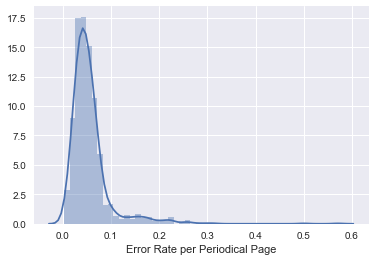

In [26]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('w', 5094),
 ('e', 2194),
 ('m', 1999),
 ('r', 1834),
 ('f', 1649),
 ('d', 1416),
 ('t', 1131),
 ('n', 1105),
 ('g', 892),
 ("'", 825),
 ('co', 605),
 ('th', 577),
 ('mt', 381),
 ('tion', 363),
 ('rd', 340),
 ('u', 336),
 ('wm', 297),
 ('re', 251),
 ('k', 220),
 ('mo', 210),
 ('ence', 178),
 ('tions', 147),
 ('ference', 139),
 ('rocklane', 139),
 ('ment', 131),
 ('z', 123),
 ('adiana', 121),
 ('ber', 111),
 ('pr', 105),
 ("canvassers'", 103),
 ('ple', 88),
 ('x', 87),
 ('geporter', 86),
 ('ers', 86),
 ('al', 85),
 ('q', 82),
 ('horlacher', 81),
 ('ly', 81),
 ('nd', 79),
 ('ren', 79),
 ('boze', 79),
 ('iu', 77),
 ('indpls', 75),
 ('mc', 75),
 ('ex', 75),
 ('id', 74),
 ('sionary', 71),
 ('ft', 71),
 ('minnick', 67),
 ('ent', 66)]

## Correction 6 -- Rejoin Split Words

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = "correction5"
cycle = "correction6"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/IR/correction6

Average verified rate: 0.9487000605025607

Average of error rates: 0.05507588532883642

Total token count: 1155323



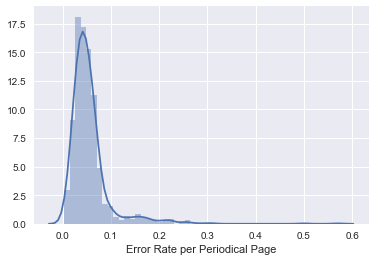

In [29]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('w', 5087),
 ('e', 2176),
 ('m', 1994),
 ('r', 1825),
 ('f', 1647),
 ('d', 1412),
 ('t', 1111),
 ('n', 1098),
 ('g', 886),
 ("'", 825),
 ('th', 555),
 ('co', 494),
 ('mt', 381),
 ('tion', 355),
 ('rd', 339),
 ('u', 335),
 ('wm', 297),
 ('k', 219),
 ('mo', 208),
 ('re', 187),
 ('ence', 178),
 ('tions', 146),
 ('ference', 139),
 ('rocklane', 139),
 ('ment', 130),
 ('z', 122),
 ('adiana', 121),
 ('ber', 108),
 ('pr', 104),
 ("canvassers'", 103),
 ('x', 87),
 ('ple', 87),
 ('geporter', 86),
 ('ers', 86),
 ('q', 82),
 ('horlacher', 81),
 ('ly', 80),
 ('nd', 79),
 ('al', 79),
 ('boze', 78),
 ('iu', 77),
 ('indpls', 75),
 ('ren', 75),
 ('ft', 71),
 ('sionary', 68),
 ('ex', 68),
 ('minnick', 67),
 ('ary', 66),
 ('id', 66),
 ('ent', 65)]

## Correction 7 -- Rejoin Split Words II

In [31]:
# %load shared_elements/rejoin_split_words.py
prev = "correction6"
cycle = "correction7"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/IR/correction7

Average verified rate: 0.9490016816153205

Average of error rates: 0.05474789207419899

Total token count: 1154842



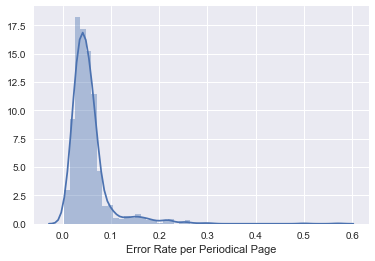

In [32]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [33]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('w', 5066),
 ('e', 2174),
 ('m', 1976),
 ('r', 1823),
 ('f', 1647),
 ('d', 1409),
 ('n', 1097),
 ('t', 1096),
 ('g', 885),
 ("'", 825),
 ('th', 551),
 ('co', 491),
 ('mt', 380),
 ('tion', 353),
 ('rd', 336),
 ('u', 332),
 ('wm', 297),
 ('k', 218),
 ('mo', 207),
 ('ence', 174),
 ('tions', 146),
 ('re', 139),
 ('rocklane', 139),
 ('ference', 137),
 ('z', 122),
 ('ment', 122),
 ('adiana', 121),
 ('ber', 106),
 ("canvassers'", 103),
 ('pr', 100),
 ('x', 87),
 ('ple', 87),
 ('geporter', 86),
 ('q', 82),
 ('ers', 82),
 ('horlacher', 81),
 ('boze', 78),
 ('iu', 77),
 ('al', 77),
 ('indpls', 75),
 ('ren', 75),
 ('nd', 73),
 ('ly', 73),
 ('ft', 69),
 ('sionary', 68),
 ('ex', 68),
 ('minnick', 67),
 ('id', 66),
 ('sr', 65),
 ('ent', 63)]

## Review Remaining Errors

In [34]:
reports.docs_with_high_error_rate(summary)

[('IR19100511-V16-10-page6.txt', 0.571),
 ('IR19100511-V16-10-page3.txt', 0.5),
 ('IR19041109-V10-23-page3.txt', 0.305),
 ('IR19040413-V10-08-page5.txt', 0.295),
 ('IR19081125-V14-25-page7.txt', 0.277),
 ('IR19040511-V10-10-page5.txt', 0.258),
 ('IR19081209-V14-26-page7.txt', 0.255),
 ('IR19040302-V10-05-page5.txt', 0.255),
 ('IR19081223-V14-27-page5.txt', 0.253),
 ('IR19081111-V14-24-page7.txt', 0.245),
 ('IR19041012-V10-21-page3.txt', 0.227),
 ('IR19080401-V14-07-page9.txt', 0.225),
 ('IR19080318-V14-06-page3.txt', 0.225),
 ('IR19040203-V10-03-page5.txt', 0.222),
 ('IR19050104-V11-01-page6.txt', 0.221),
 ('IR19081014-V14-22-page7.txt', 0.221),
 ('IR19090106-V15-01-page5.txt', 0.217),
 ('IR19070102-V13-01-page1.txt', 0.215),
 ('IR19090203-V15-03-page3.txt', 0.21),
 ('IR19040106-V10-01-page6.txt', 0.209),
 ('IR19080513-V14-10-page7.txt', 0.208),
 ('IR19030204-V09-03-page3.txt', 0.207)]

In [35]:
# %load shared_elements/high_error_rates.py
doc_keys = [x[0] for x in reports.docs_with_high_error_rate(summary) if x[1] > 0.25]

# utilities.open_original_docs(doc_keys, directories['cycle'])

High error documents are charts of pledges for the local training school.

In [36]:
reports.long_errors(errors_summary, min_length=15)[:100]

(['bartdemonstrated',
  'black-stringleave',
  'certificateentitles',
  'followrecunimendations',
  'sivaranwseswavieni',
  'carefulsuccession',
  'corresponmembers',
  'ontheirbacksonabitofrushmatting',
  'childrenintelligent',
  'logansubscriptions',
  'threattemptation',
  'septemencouraging',
  'inauguratintroduced',
  'meansperformance',
  'finaldifficulties',
  'harmonionsdevelopment',
  'withdenominational',
  'wedding-ring-rub',
  'conunprecedented',
  'eeeeeereeeetoteeeeet',
  'churchmembersneglecttopay',
  'enlightenpamphlets',
  'cheerdevelopement',
  'raffifitsmowiwkwiewaresie',
  'overcomcooperation',
  'peoplethroughont',
  'seeeeeeeeereeeee',
  'positiveposition',
  'improveappearance',
  "whichisever'tobealoyal",
  'systematchildren',
  'virteen-year-old',
  'circumstanterrible',
  'celebratannouncement',
  "etriiiiibiyikeib's",
  'subscripchildren',
  'unnecesmissionary',
  'medicarmissionary',
  'meetorganization',
  'canvassextensively',
  'thesewillcertainlyhavea',


## Correction 8 -- Remove long error tokens

In [37]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = cycle
cycle = "correction8"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(clean.check_for_repeating_characters(tokens, "e|E"))
    replacements.append(clean.check_for_repeating_characters(tokens, "a|A"))
    replacements.append(clean.check_for_repeating_characters(tokens, ""))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

IR19020618-V08-13-page3.txt: [('veeeeeeeeeeeeeeeeeeeek', ' ')]
IR19020702-V08-14-page2.txt: [('eeeeeseeeEeeeeeeeee', ' ')]
IR19040120-V10-02-page5.txt: [('EeeeeeEeeeeeE', ' ')]
IR19060328-V12-07-page5.txt: [('feeeeeeeeefieeeeettes', ' ')]
IR19060815-V12-17-page3.txt: [('.seeeseeetiefeeeee', ' ')]
IR19061107-V12-23-page5.txt: [('NPeeeeiceeeeeeee', ' ')]
IR19061205-V12-25-page5.txt: [('aaaasaaaasetaaaav', ' ')]
IR19070410-V13-08-page5.txt: [('veeeeeeeeeeeeeeteeeteeeiseeeeeeeeeeeeEee', ' '), ('seaaaaaaaasarwposaa', ' ')]
IR19070410-V13-08-page7.txt: [('aaaaaassiwaesaaaaeoaetaaN', ' ')]
IR19070424-V13-09-page7.txt: [('ccieeeeeeeeeeeeeviirzie', ' ')]
IR19070424-V13-09-page8.txt: [('eeeeeeeeeeeeeeeeeet', ' ')]
IR19070508-V13-10-page7.txt: [('liegeeeeeeeeeeeeeeeeee', ' '), ('Netweeseeeeeeeereoweee', ' ')]
IR19070605-V13-12-page3.txt: [('Eoceeeeeeeeleceee', ' ')]
IR19070619-V13-13-page8.txt: [('eeeeeeeeefeeeci', ' ')]
IR19070703-V13-14-page3.txt: [('.seeeeeeeweee', ' ')]
IR19070918-V13-19-page

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/IR/correction8

Average verified rate: 0.9490411276816472

Average of error rates: 0.05470489038785834

Total token count: 1154794



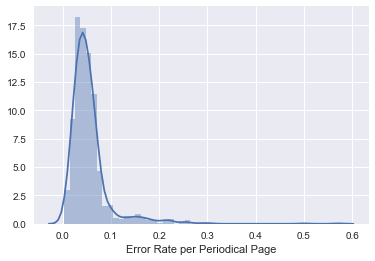

In [38]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [39]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('w', 5066),
 ('e', 2174),
 ('m', 1976),
 ('r', 1823),
 ('f', 1647),
 ('d', 1409),
 ('n', 1097),
 ('t', 1096),
 ('g', 885),
 ("'", 825),
 ('th', 551),
 ('co', 491),
 ('mt', 380),
 ('tion', 353),
 ('rd', 336),
 ('u', 332),
 ('wm', 297),
 ('k', 217),
 ('mo', 207),
 ('ence', 174),
 ('tions', 146),
 ('re', 139),
 ('rocklane', 139),
 ('ference', 137),
 ('z', 122),
 ('ment', 122),
 ('adiana', 121),
 ('ber', 106),
 ("canvassers'", 103),
 ('pr', 100),
 ('x', 87),
 ('ple', 87),
 ('geporter', 86),
 ('q', 82),
 ('ers', 82),
 ('horlacher', 81),
 ('boze', 78),
 ('iu', 77),
 ('al', 77),
 ('indpls', 75),
 ('ren', 75),
 ('nd', 73),
 ('ly', 73),
 ('ft', 69),
 ('sionary', 68),
 ('ex', 68),
 ('minnick', 67),
 ('id', 66),
 ('sr', 65),
 ('ent', 63)]

## Correction 9 -- Separate Squash Words

In [40]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction9"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = utilities.readfile(directories['prev'], filename)
    clean.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = utilities.strip_punct(content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = clean.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if clean.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

IR19011009-V07-20-page8.txt: [('estedfamilyatColumbus', 'est ed family at Columbus'), ('andheisverymuchinterested', 'and he is very much interested')]
IR19020212-V08-04-page3.txt: [('trainpossibilities', 'train possibilities'), ('ChurchSchoolTeachers', 'Church School Teachers')]
IR19020226-V08-05-page3.txt: [('werenotannouncedpubliclyuntilI', 'were not announced publicly until I')]
IR19020604-V08-12-page3.txt: [('faithfulcanvassers', 'faithful canvassers')]
IR19020702-V08-14-page3.txt: [('deliveringevenings', 'delivering evenings'), ('simplestatepropose', 'simple state propose')]
IR19021001-V08-19-page2.txt: [('childrenintelligent', 'children intelligent')]
IR19021029-V08-21-page3.txt: [('ontheirbacksonabitofrushmatting', 'on their back son a bit of rush mat ting'), ('REPORTOFCANVASSINGWORKFORTWO', 'REPORT OF CANVASSING WORK FOR TWO')]
IR19021112-V08-22-page3.txt: [('CANVASSINGWORKFORTWOWEEKS', 'CANVASSING WORK FOR TWO WEEKS')]
IR19030204-V09-03-page4.txt: [('REPORTOFCANVASSING', 'REPO

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/IR/correction9

Average verified rate: 0.9491017808532303

Average of error rates: 0.0546433389544688

Total token count: 1154952



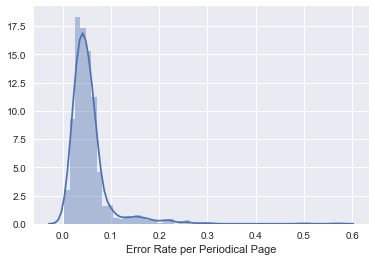

In [41]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [42]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('w', 5066),
 ('e', 2174),
 ('m', 1976),
 ('r', 1823),
 ('f', 1647),
 ('d', 1409),
 ('n', 1097),
 ('t', 1096),
 ('g', 885),
 ("'", 825),
 ('th', 551),
 ('co', 491),
 ('mt', 380),
 ('tion', 353),
 ('rd', 336),
 ('u', 332),
 ('wm', 297),
 ('k', 217),
 ('mo', 207),
 ('ence', 174),
 ('tions', 146),
 ('re', 139),
 ('rocklane', 139),
 ('ference', 137),
 ('z', 122),
 ('ment', 122),
 ('adiana', 121),
 ('ber', 106),
 ("canvassers'", 103),
 ('pr', 100),
 ('x', 87),
 ('ple', 87),
 ('geporter', 86),
 ('q', 82),
 ('ers', 82),
 ('horlacher', 81),
 ('boze', 78),
 ('iu', 77),
 ('al', 77),
 ('indpls', 75),
 ('ren', 75),
 ('nd', 73),
 ('ly', 73),
 ('ft', 69),
 ('sionary', 68),
 ('ex', 68),
 ('minnick', 67),
 ('id', 66),
 ('sr', 65),
 ('ent', 63)]